In [53]:
!pip install opencv-python-headless

In [54]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import os

root='/content/gdrive/MyDrive/Colab Notebooks/Handwritten Signature Data/gray_scale'

for i in range(0,16):
  os.mkdir(os.path.join(root, f'signature_{i+1}'))

In [ ]:
# for renaming the folders and images

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Handwritten Signature Data/data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))  

In [ ]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
from google.colab.patches import cv2_imshow 

directory = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

In [4]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline('C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale')  # gray image source path

In [ ]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [ ]:
p.sample(1600)

In [ ]:
# To rename Augmented Data

data_dir = 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

In [6]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [5]:
import splitfolders
input_folder = "C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//gray_scale//output"
splitfolders.ratio (input_folder, output="C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25/",
                seed=42, ratio=(.75,.25),
                group_prefix=None)

Copying files: 1600 files [01:38, 16.29 files/s]


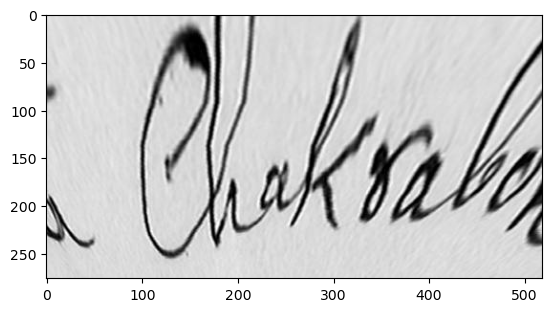

In [7]:
img = image.load_img('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25//train//subject_1//signature_9.jpg')
plt.imshow(img)
# print(img.shape)

In [8]:
print(cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25//train//subject_1//signature_11.jpg').shape)
cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_75_25//train//subject_1//signature_11.jpg')

(276, 519, 3)


array([[[223, 223, 223],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [ 87,  87,  87],
        [ 76,  76,  76],
        [ 67,  67,  67]],

       [[218, 218, 218],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [212, 212, 212],
        [210, 210, 210]],

       [[218, 218, 218],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [222, 222, 222],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [213, 213, 213],
        ...,
        [215, 215, 215],
        [216, 216, 216],
        [216, 216, 216]],

       [[215, 215, 215],
        [215, 215, 215],
        [216, 216, 216],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [220, 220, 220],
        [221, 221, 221],
        [221, 221, 221]]

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)



In [57]:
train_generator=train_datagen.flow_from_directory('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_80_20//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1273 images belonging to 16 classes.
Found 327 images belonging to 16 classes.


In [58]:
num_samples = len(train_generator)
x_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)


## 25 Epoch

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/25
40/40 [==============================] - 109s 2s/step - loss: 2.8090 - accuracy: 0.0605 - val_loss: 2.7706 - val_accuracy: 0.0917
Epoch 2/25
40/40 [==============================] - 37s 928ms/step - loss: 2.7740 - accuracy: 0.0833 - val_loss: 2.7622 - val_accuracy: 0.0765
Epoch 3/25
40/40 [==============================] - 33s 837ms/step - loss: 2.7641 - accuracy: 0.0754 - val_loss: 2.7597 - val_accuracy: 0.0887
Epoch 4/25
40/40 [==============================] - 34s 838ms/step - loss: 2.7567 - accuracy: 0.0872 - val_loss: 2.7553 - val_accuracy: 0.0826
Epoch 5/25
40/40 [==============================] - 49s 1s/step - loss: 2.7482 - accuracy: 0.0864 - val_loss: 2.7509 - val_accuracy: 0.0826
Epoch 6/25
40/40 [==============================] - 41s 1s/step - loss: 2.7421 - accuracy: 0.0982 - val_loss: 2.7495 - val_accuracy: 0.0795
Epoch 7/25
40/40 [==============================] - 47s 1s/step - loss: 2.7467 - accuracy: 0.0911 - val_loss: 2.7496 - val_accuracy: 0.0948
Epoch 8/25

In [60]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 9s 575ms/step - loss: 2.4353 - accuracy: 0.1713
Test Loss: 2.435288906097412
Test Accuracy: 0.17125381529331207
11/11 [==============================] - 30s 589ms/step


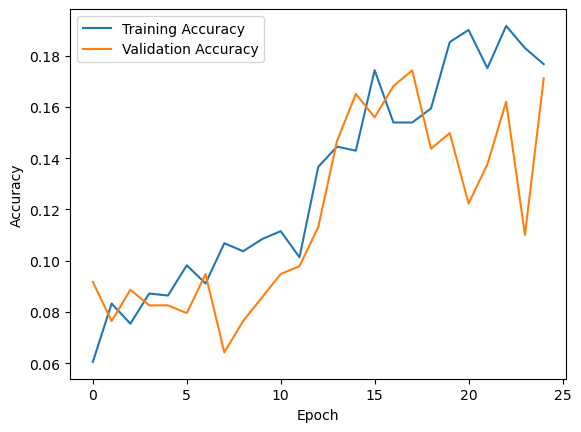

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

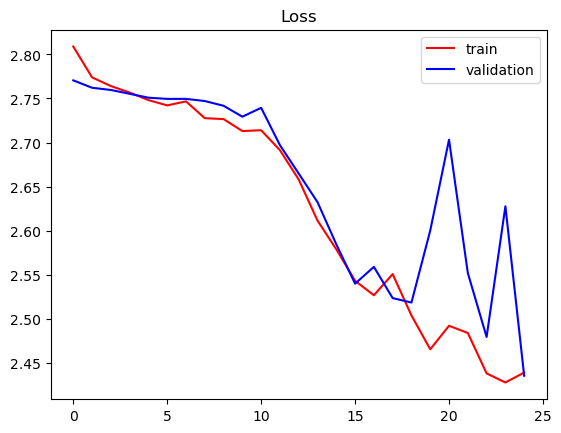

In [62]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [63]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 8s 568ms/step
Confusion Matrix:
[[ 0  2  0  2  0  0  1  2  0  0  0  0  0  0  0  9]
 [ 0  8  0  4  0  0  1  1  0  1  1  0  0  0  0  7]
 [ 0  5  0  1  0  0  3  1  2  0  1  1  0  0  0  9]
 [ 0  2  0 13  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  1  7  0  0  1  0  0  0  5]
 [ 0  3  0  5  0  0  1  7  0  0  0  1  0  0  0  2]
 [ 0  0  0  0  0  0  6  0  8  0  0  0  0  0  0  9]
 [ 0  0  1 12  0  0  0  5  0  1  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  4  0 12  0  0  0  0  0  0  4]
 [ 0  4  0  1  0  0  1  1  0  0  3  0  0  0  0  9]
 [ 0  4  0  2  0  0  2  2  1  1  0  1  0  0  0  8]
 [ 0  6  0  2  0  0  0  7  0  0  0  0  0  0  0 10]
 [ 0  2  0  0  0  0  3  0  7  0  0  0  0  0  0  7]
 [ 0  2  0 14  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  1  2  1  0  0  0  0  0  0 16]
 [ 0  1  0  0  0  0  0  2  4  0  0  2  0  0  0 12]]


11/11 [==============================] - 9s 581ms/step


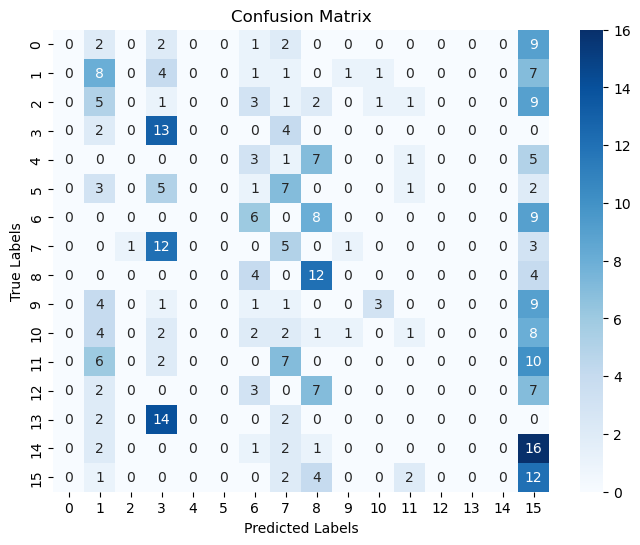

In [64]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.3478, FPR = 0.1086, TNR = 0.8914, FNR = 0.6522
Class 2: TPR = 0.0000, FPR = 0.0033, TNR = 0.9967, FNR = 1.0000
Class 3: TPR = 0.6842, FPR = 0.1396, TNR = 0.8604, FNR = 0.3158
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.2609, FPR = 0.0658, TNR = 0.9342, FNR = 0.7391
Class 7: TPR = 0.2273, FPR = 0.1049, TNR = 0.8951, FNR = 0.7727
Class 8: TPR = 0.6000, FPR = 0.0977, TNR = 0.9023, FNR = 0.4000
Class 9: TPR = 0.0000, FPR = 0.0097, TNR = 0.9903, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0163, TNR = 0.9837, FNR = 1.0000
Class 11: TPR = 0.0000, FPR = 0.0199, TNR = 0.9801, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.5714, FPR = 0.320

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


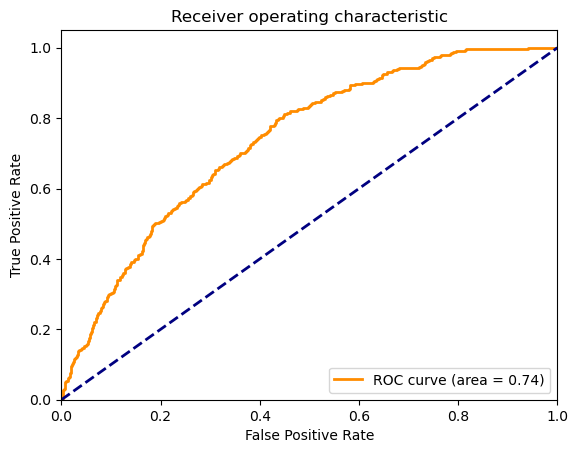

In [66]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 8s 586ms/step - loss: 2.4353 - accuracy: 0.1713
Test Loss: 2.435288906097412
Test Accuracy: 0.17125381529331207
11/11 [==============================] - 9s 595ms/step
AUC for class 0: 0.5171
AUC for class 1: 0.7067
AUC for class 2: 0.5110
AUC for class 3: 0.9214
AUC for class 4: 0.7763
AUC for class 5: 0.7237
AUC for class 6: 0.8422
AUC for class 7: 0.8136
AUC for class 8: 0.9078
AUC for class 9: 0.5742
AUC for class 10: 0.6015
AUC for class 11: 0.6074
AUC for class 12: 0.7628
AUC for class 13: 0.8839
AUC for class 14: 0.5784
AUC for class 15: 0.6640


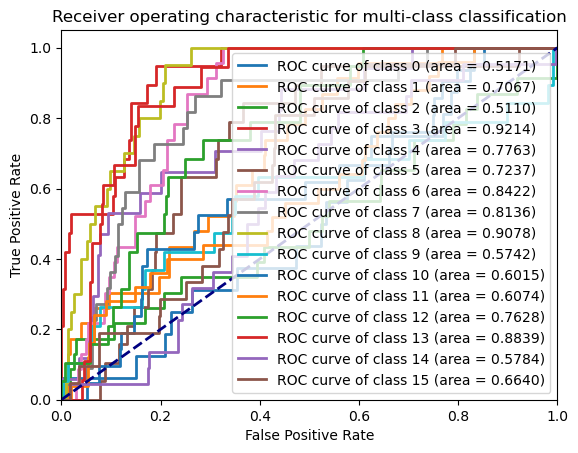

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 30 Epoch

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/30
40/40 [==============================] - 136s 2s/step - loss: 2.8017 - accuracy: 0.0621 - val_loss: 2.7730 - val_accuracy: 0.0765
Epoch 2/30
40/40 [==============================] - 69s 2s/step - loss: 2.7719 - accuracy: 0.0676 - val_loss: 2.7638 - val_accuracy: 0.0765
Epoch 3/30
40/40 [==============================] - 60s 2s/step - loss: 2.7622 - accuracy: 0.0770 - val_loss: 2.7620 - val_accuracy: 0.0673
Epoch 4/30
40/40 [==============================] - 64s 2s/step - loss: 2.7577 - accuracy: 0.0864 - val_loss: 2.7616 - val_accuracy: 0.0734
Epoch 5/30
40/40 [==============================] - 79s 2s/step - loss: 2.7508 - accuracy: 0.0943 - val_loss: 2.7645 - val_accuracy: 0.1070
Epoch 6/30
40/40 [==============================] - 88s 2s/step - loss: 2.7417 - accuracy: 0.1053 - val_loss: 2.7474 - val_accuracy: 0.0795
Epoch 7/30
40/40 [==============================] - 89s 2s/step - loss: 2.7304 - accuracy: 0.1029 - val_loss: 2.7572 - val_accuracy: 0.1131
Epoch 8/30
40/40 [=

In [69]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 9s 643ms/step - loss: 2.3975 - accuracy: 0.1560
Test Loss: 2.3974766731262207
Test Accuracy: 0.15596330165863037
11/11 [==============================] - 29s 493ms/step


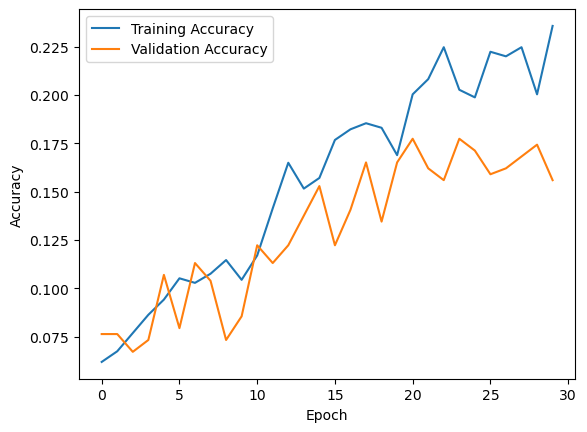

In [70]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

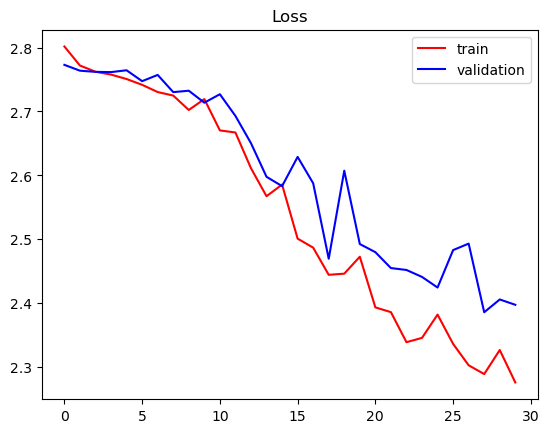

In [71]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [72]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 8s 578ms/step
Confusion Matrix:
[[ 0  3  1  4  0  0  3  1  1  0  0  1  0  0  1  1]
 [ 0  6  1  8  0  0  0  3  0  0  4  1  0  0  0  0]
 [ 0  4  4  2  0  0  2  1  1  0  2  2  1  0  2  2]
 [ 0  0  0 15  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  2  2  2  0  0  7  0  4  0  0  0  0  0  0  0]
 [ 0  1  3 11  0  0  1  2  0  0  0  0  0  0  1  0]
 [ 0  0  1  0  0  0  8  0  4  0  0  1  2  0  5  2]
 [ 0  0  2 11  0  2  1  5  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  1  0  7  0  9  0  0  0  0  0  2  0]
 [ 0  3  5  3  0  0  1  1  1  0  3  2  0  0  0  0]
 [ 0  3  5  4  0  0  2  2  0  1  0  2  0  0  2  0]
 [ 0  8  3  4  0  0  0  4  0  1  0  1  0  0  4  0]
 [ 0  3  2  0  0  0  4  0  4  0  1  0  1  0  4  0]
 [ 0  1  0 15  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  4  4  1  0  1  2  3  2  1  0  1  0  0  2  1]
 [ 0  3  3  0  0  2  3  0  2  0  1  4  0  0  3  0]]


11/11 [==============================] - 8s 545ms/step


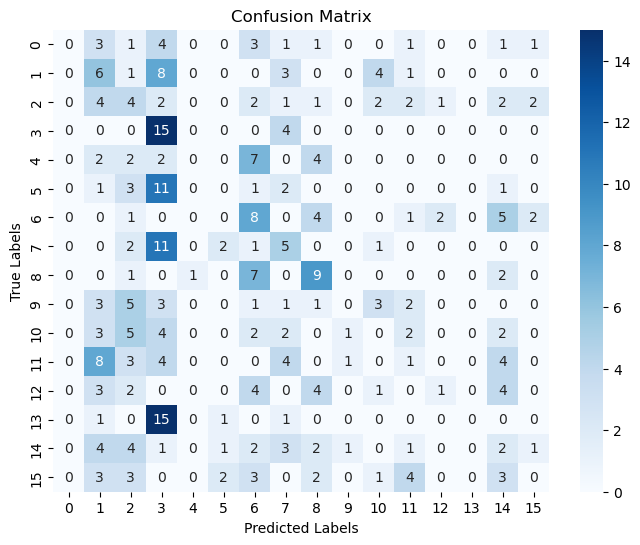

In [73]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [74]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.2609, FPR = 0.1151, TNR = 0.8849, FNR = 0.7391
Class 2: TPR = 0.1739, FPR = 0.1086, TNR = 0.8914, FNR = 0.8261
Class 3: TPR = 0.7895, FPR = 0.2110, TNR = 0.7890, FNR = 0.2105
Class 4: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0195, TNR = 0.9805, FNR = 1.0000
Class 6: TPR = 0.3478, FPR = 0.1086, TNR = 0.8914, FNR = 0.6522
Class 7: TPR = 0.2273, FPR = 0.0721, TNR = 0.9279, FNR = 0.7727
Class 8: TPR = 0.4500, FPR = 0.0619, TNR = 0.9381, FNR = 0.5500
Class 9: TPR = 0.0000, FPR = 0.0097, TNR = 0.9903, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0392, TNR = 0.9608, FNR = 1.0000
Class 11: TPR = 0.0400, FPR = 0.0464, TNR = 0.9536, FNR = 0.9600
Class 12: TPR = 0.0526, FPR = 0.0097, TNR = 0.9903, FNR = 0.9474
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0909, FPR = 0.0787, TNR = 0.9213, FNR = 0.9091
Class 15: TPR = 0.0000, FPR = 0.019

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


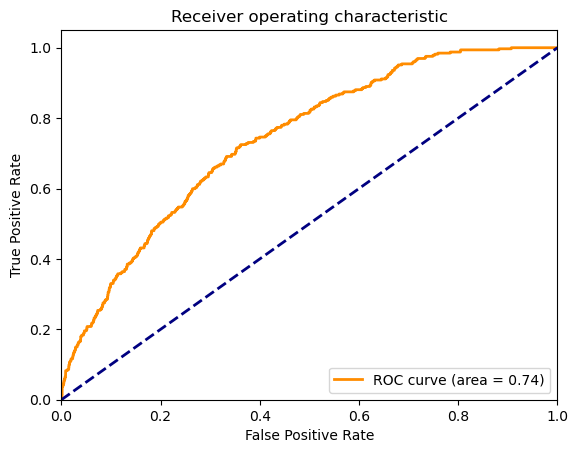

In [75]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 9s 629ms/step - loss: 2.3975 - accuracy: 0.1560
Test Loss: 2.3974766731262207
Test Accuracy: 0.15596330165863037
11/11 [==============================] - 8s 639ms/step
AUC for class 0: 0.5090
AUC for class 1: 0.7633
AUC for class 2: 0.5815
AUC for class 3: 0.9214
AUC for class 4: 0.7548
AUC for class 5: 0.7186
AUC for class 6: 0.8480
AUC for class 7: 0.8140
AUC for class 8: 0.9220
AUC for class 9: 0.6159
AUC for class 10: 0.6012
AUC for class 11: 0.6322
AUC for class 12: 0.7635
AUC for class 13: 0.8623
AUC for class 14: 0.5437
AUC for class 15: 0.6130


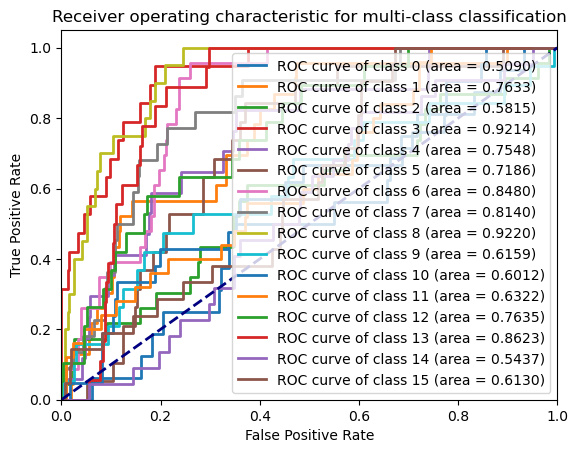

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 35 Epoch

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=35, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/35
40/40 [==============================] - 183s 3s/step - loss: 2.7959 - accuracy: 0.0715 - val_loss: 2.7711 - val_accuracy: 0.0642
Epoch 2/35
40/40 [==============================] - 74s 2s/step - loss: 2.7798 - accuracy: 0.0699 - val_loss: 2.7670 - val_accuracy: 0.0765
Epoch 3/35
40/40 [==============================] - 76s 2s/step - loss: 2.7671 - accuracy: 0.0825 - val_loss: 2.7580 - val_accuracy: 0.0979
Epoch 4/35
40/40 [==============================] - 74s 2s/step - loss: 2.7528 - accuracy: 0.0919 - val_loss: 2.7557 - val_accuracy: 0.0917
Epoch 5/35
40/40 [==============================] - 72s 2s/step - loss: 2.7494 - accuracy: 0.0919 - val_loss: 2.7486 - val_accuracy: 0.1009
Epoch 6/35
40/40 [==============================] - 70s 2s/step - loss: 2.7353 - accuracy: 0.1045 - val_loss: 2.7793 - val_accuracy: 0.0703
Epoch 7/35
40/40 [==============================] - 84s 2s/step - loss: 2.7419 - accuracy: 0.0943 - val_loss: 2.7470 - val_accuracy: 0.0917
Epoch 8/35
40/40 [=

In [78]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 6s 461ms/step - loss: 2.3901 - accuracy: 0.1988
Test Loss: 2.3900561332702637
Test Accuracy: 0.1987767517566681
11/11 [==============================] - 16s 444ms/step


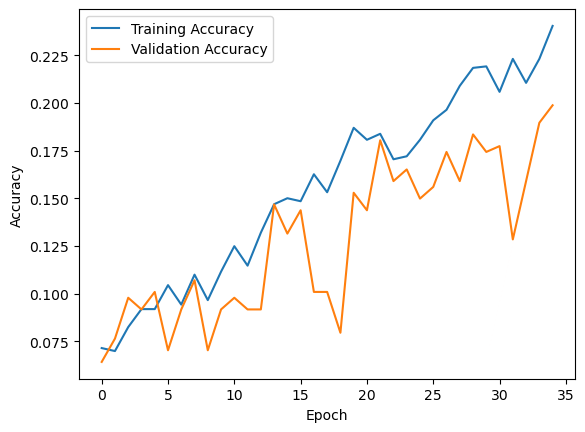

In [79]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

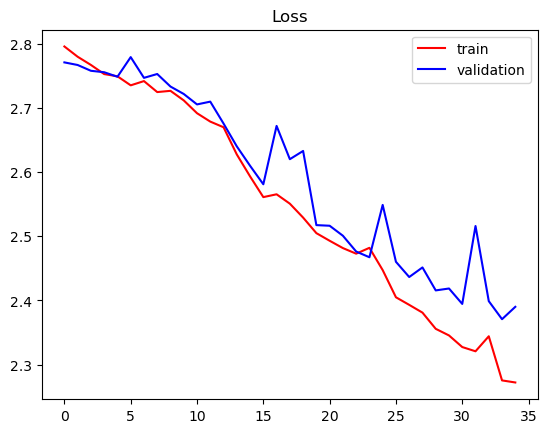

In [80]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [81]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 9s 620ms/step
Confusion Matrix:
[[ 0  2  4  0  0  0  4  0  2  0  2  0  0  0  1  1]
 [ 0 10  3  1  0  0  4  2  0  0  2  0  0  0  1  0]
 [ 0  1  7  1  0  0  6  0  1  1  3  0  0  0  3  0]
 [ 0  1  0 11  0  0  0  6  0  0  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  8  0  4  1  0  0  0  0  1  0]
 [ 0  4  8  2  0  0  1  3  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 21  0  2  0  0  0  0  0  0  0]
 [ 0  3  5  8  0  1  1  3  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 13  0  6  0  1  0  0  0  0  0]
 [ 0  3  7  0  0  0  3  0  1  0  4  0  0  0  1  0]
 [ 0  2  4  1  0  0  6  0  1  1  2  0  0  0  4  0]
 [ 0  4  5  1  0  0  3  3  2  0  4  1  0  0  2  0]
 [ 0  2  1  0  0  0 12  0  3  0  0  0  0  0  1  0]
 [ 0  2  1 10  0  0  0  2  0  0  1  0  0  2  0  0]
 [ 0  1  6  0  0  0  9  1  2  0  1  0  0  0  2  0]
 [ 0  0  3  0  0  0  9  0  4  0  2  0  0  0  3  0]]


11/11 [==============================] - 8s 512ms/step


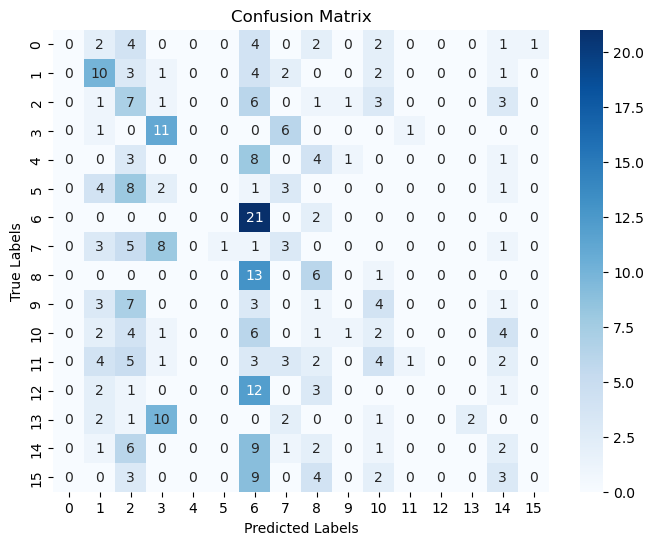

In [82]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [83]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.4348, FPR = 0.0822, TNR = 0.9178, FNR = 0.5652
Class 2: TPR = 0.3043, FPR = 0.1645, TNR = 0.8355, FNR = 0.6957
Class 3: TPR = 0.5789, FPR = 0.0779, TNR = 0.9221, FNR = 0.4211
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 6: TPR = 0.9130, FPR = 0.2599, TNR = 0.7401, FNR = 0.0870
Class 7: TPR = 0.1364, FPR = 0.0557, TNR = 0.9443, FNR = 0.8636
Class 8: TPR = 0.3000, FPR = 0.0717, TNR = 0.9283, FNR = 0.7000
Class 9: TPR = 0.0000, FPR = 0.0097, TNR = 0.9903, FNR = 1.0000
Class 10: TPR = 0.0952, FPR = 0.0654, TNR = 0.9346, FNR = 0.9048
Class 11: TPR = 0.0400, FPR = 0.0033, TNR = 0.9967, FNR = 0.9600
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.1111, FPR = 0.0000, TNR = 1.0000, FNR = 0.8889
Class 14: TPR = 0.0909, FPR = 0.0623, TNR = 0.9377, FNR = 0.9091
Class 15: TPR = 0.0000, FPR = 0.003

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


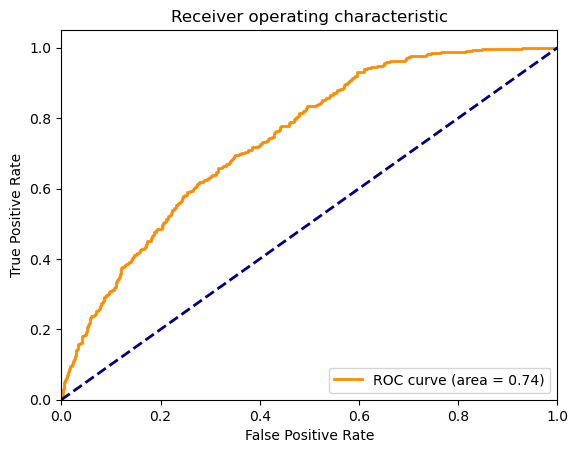

In [84]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 8s 569ms/step - loss: 2.3901 - accuracy: 0.1988
Test Loss: 2.3900561332702637
Test Accuracy: 0.1987767517566681
11/11 [==============================] - 9s 604ms/step
AUC for class 0: 0.5054
AUC for class 1: 0.7155
AUC for class 2: 0.5759
AUC for class 3: 0.9371
AUC for class 4: 0.7290
AUC for class 5: 0.6977
AUC for class 6: 0.8332
AUC for class 7: 0.8079
AUC for class 8: 0.8893
AUC for class 9: 0.6849
AUC for class 10: 0.6295
AUC for class 11: 0.6358
AUC for class 12: 0.7302
AUC for class 13: 0.8864
AUC for class 14: 0.6162
AUC for class 15: 0.6648


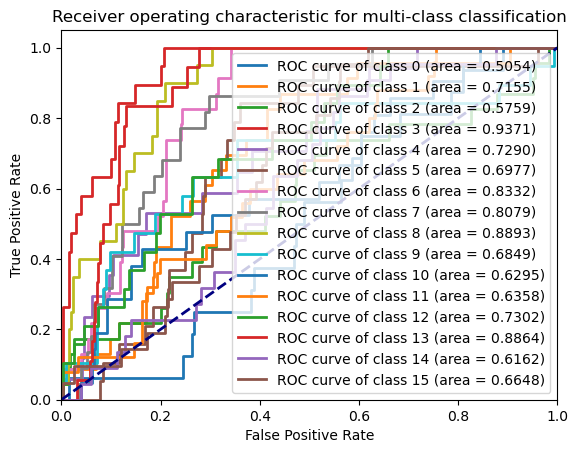

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 40 Epoch

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=40, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/40
40/40 [==============================] - 219s 4s/step - loss: 2.8118 - accuracy: 0.0691 - val_loss: 2.7788 - val_accuracy: 0.0765
Epoch 2/40
40/40 [==============================] - 64s 2s/step - loss: 2.7722 - accuracy: 0.0676 - val_loss: 2.7661 - val_accuracy: 0.0703
Epoch 3/40
40/40 [==============================] - 63s 2s/step - loss: 2.7612 - accuracy: 0.0856 - val_loss: 2.7656 - val_accuracy: 0.0826
Epoch 4/40
40/40 [==============================] - 60s 2s/step - loss: 2.7594 - accuracy: 0.0872 - val_loss: 2.7641 - val_accuracy: 0.0856
Epoch 5/40
40/40 [==============================] - 60s 1s/step - loss: 2.7513 - accuracy: 0.0943 - val_loss: 2.7739 - val_accuracy: 0.0734
Epoch 6/40
40/40 [==============================] - 68s 2s/step - loss: 2.7460 - accuracy: 0.0935 - val_loss: 2.7586 - val_accuracy: 0.0856
Epoch 7/40
40/40 [==============================] - 70s 2s/step - loss: 2.7367 - accuracy: 0.0982 - val_loss: 2.7509 - val_accuracy: 0.0734
Epoch 8/40
40/40 [=

In [87]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 9s 619ms/step - loss: 2.5060 - accuracy: 0.1498
Test Loss: 2.505967378616333
Test Accuracy: 0.1498470902442932
11/11 [==============================] - 18s 602ms/step


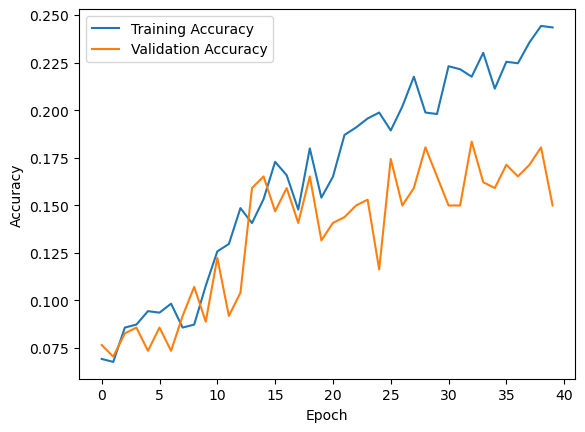

In [88]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

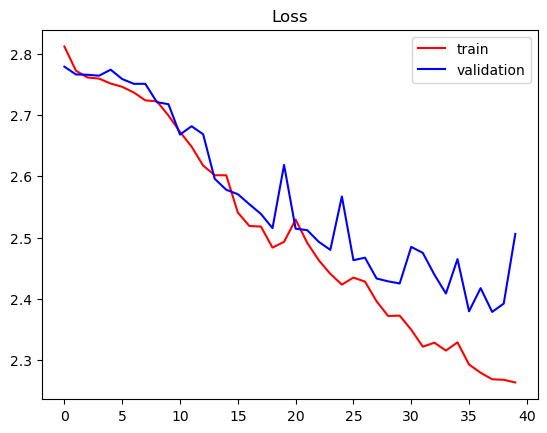

In [89]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [90]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 9s 616ms/step
Confusion Matrix:
[[ 0  2  0  4  1  1  0  3  0  0  0  1  0  0  0  4]
 [ 0  9  1  6  0  1  0  2  0  0  4  0  0  0  0  0]
 [ 0  9  0  2  0  1  0  4  1  0  1  0  0  0  1  4]
 [ 0  0  0 15  0  1  0  3  0  0  0  0  0  0  0  0]
 [ 0  2  1  0  1  1  1  3  4  0  0  0  0  0  2  2]
 [ 0  1  0 10  0  1  0  6  0  0  0  0  0  0  0  1]
 [ 0  1  1  0  1  0  0  0  6  0  1  2  1  0  9  1]
 [ 0  1  0 15  0  0  0  5  0  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  1  0 11  0  0  0  0  0  3  4]
 [ 0  5  0  2  0  1  0  7  0  0  1  1  0  0  2  0]
 [ 0  6  1  3  0  2  0  2  1  0  1  2  0  1  1  1]
 [ 0 12  0  4  0  0  0  7  0  0  1  1  0  0  0  0]
 [ 0  2  0  0  0  1  0  2  2  0  2  2  1  0  4  3]
 [ 0  1  0 15  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  7  0  2  0  1  1  3  0  0  1  4  0  0  2  1]
 [ 0  3  1  0  0  2  0  4  1  0  3  3  0  0  2  2]]


11/11 [==============================] - 8s 555ms/step


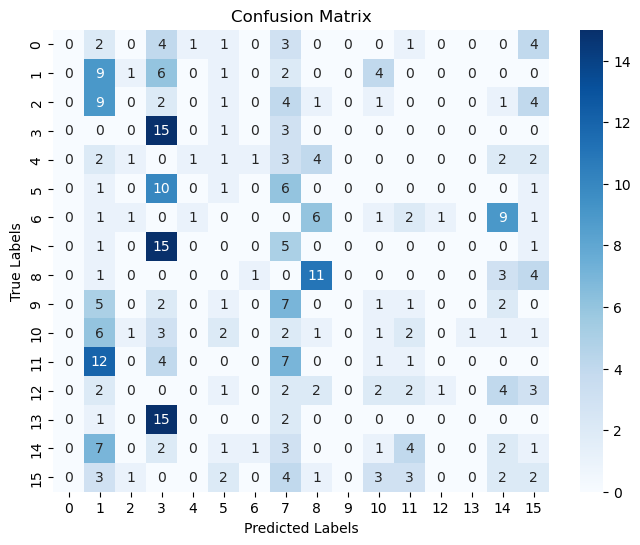

In [91]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.3913, FPR = 0.1743, TNR = 0.8257, FNR = 0.6087
Class 2: TPR = 0.0000, FPR = 0.0164, TNR = 0.9836, FNR = 1.0000
Class 3: TPR = 0.7895, FPR = 0.2045, TNR = 0.7955, FNR = 0.2105
Class 4: TPR = 0.0588, FPR = 0.0065, TNR = 0.9935, FNR = 0.9412
Class 5: TPR = 0.0526, FPR = 0.0390, TNR = 0.9610, FNR = 0.9474
Class 6: TPR = 0.0000, FPR = 0.0099, TNR = 0.9901, FNR = 1.0000
Class 7: TPR = 0.2273, FPR = 0.1574, TNR = 0.8426, FNR = 0.7727
Class 8: TPR = 0.5500, FPR = 0.0489, TNR = 0.9511, FNR = 0.4500
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0476, FPR = 0.0458, TNR = 0.9542, FNR = 0.9524
Class 11: TPR = 0.0400, FPR = 0.0497, TNR = 0.9503, FNR = 0.9600
Class 12: TPR = 0.0526, FPR = 0.0032, TNR = 0.9968, FNR = 0.9474
Class 13: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 14: TPR = 0.0909, FPR = 0.0787, TNR = 0.9213, FNR = 0.9091
Class 15: TPR = 0.0952, FPR = 0.071

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


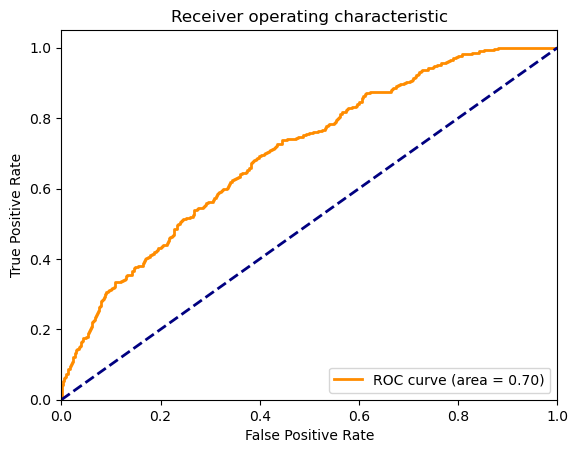

In [93]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 8s 622ms/step - loss: 2.5060 - accuracy: 0.1498
Test Loss: 2.505967378616333
Test Accuracy: 0.1498470902442932
11/11 [==============================] - 9s 638ms/step
AUC for class 0: 0.5336
AUC for class 1: 0.7659
AUC for class 2: 0.4468
AUC for class 3: 0.9212
AUC for class 4: 0.7552
AUC for class 5: 0.7618
AUC for class 6: 0.8528
AUC for class 7: 0.8124
AUC for class 8: 0.9135
AUC for class 9: 0.5713
AUC for class 10: 0.6257
AUC for class 11: 0.5722
AUC for class 12: 0.7438
AUC for class 13: 0.8607
AUC for class 14: 0.5459
AUC for class 15: 0.6078


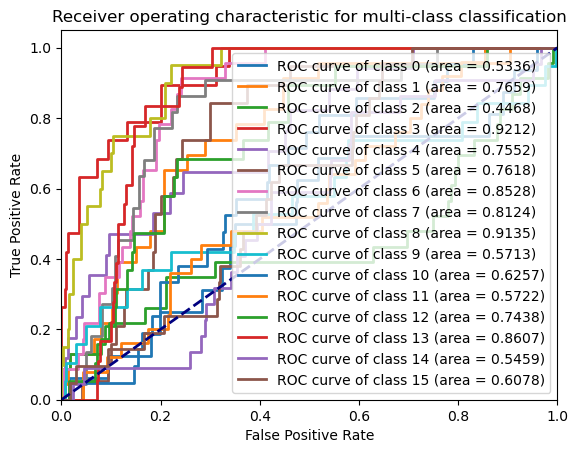

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 80 Epoch

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=80, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/80
40/40 [==============================] - 137s 2s/step - loss: 2.7948 - accuracy: 0.0652 - val_loss: 2.7680 - val_accuracy: 0.0734
Epoch 2/80
40/40 [==============================] - 60s 1s/step - loss: 2.7708 - accuracy: 0.0699 - val_loss: 2.7619 - val_accuracy: 0.0826
Epoch 3/80
40/40 [==============================] - 62s 2s/step - loss: 2.7635 - accuracy: 0.0746 - val_loss: 2.7660 - val_accuracy: 0.0826
Epoch 4/80
40/40 [==============================] - 60s 2s/step - loss: 2.7617 - accuracy: 0.0848 - val_loss: 2.7617 - val_accuracy: 0.0703
Epoch 5/80
40/40 [==============================] - 68s 2s/step - loss: 2.7631 - accuracy: 0.0825 - val_loss: 2.7605 - val_accuracy: 0.0703
Epoch 6/80
40/40 [==============================] - 67s 2s/step - loss: 2.7559 - accuracy: 0.0864 - val_loss: 2.7563 - val_accuracy: 0.0703
Epoch 7/80
40/40 [==============================] - 70s 2s/step - loss: 2.7385 - accuracy: 0.1021 - val_loss: 2.7583 - val_accuracy: 0.0826
Epoch 8/80
40/40 [=

In [96]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

11/11 [==============================] - 6s 492ms/step - loss: 2.4665 - accuracy: 0.1621
Test Loss: 2.4665496349334717
Test Accuracy: 0.16207951307296753
11/11 [==============================] - 18s 483ms/step


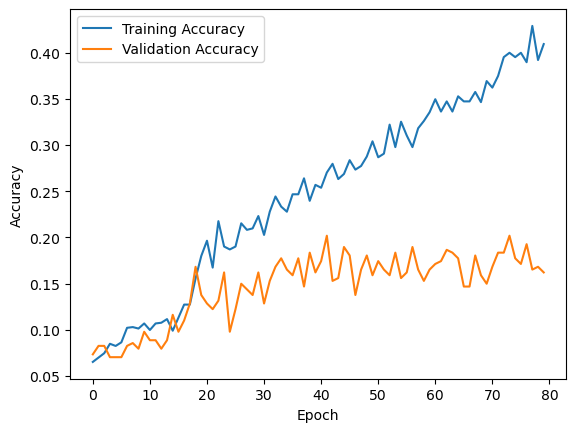

In [97]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

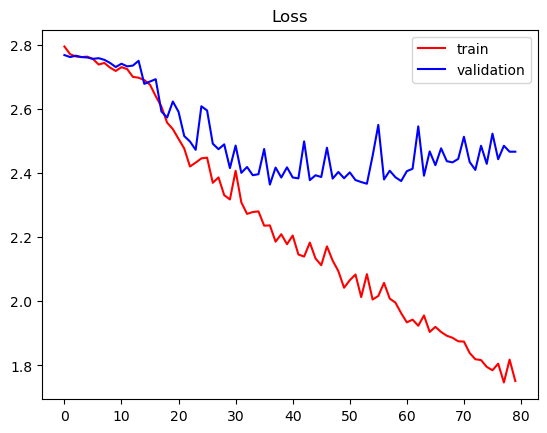

In [98]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [99]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

11/11 [==============================] - 7s 488ms/step
Confusion Matrix:
[[ 0  1  4  0  0  6  3  0  0  0  0  0  0  0  0  2]
 [ 0  3  1  1  0  6  0  4  0  0  1  2  1  2  1  1]
 [ 0  2  3  0  1  2  1  0  1  0  1  2  4  1  2  3]
 [ 0  1  0  9  0  3  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  2  2  0  4  0  0  0  4  0  0  4]
 [ 0  0  0  2  0 12  0  0  0  0  0  1  1  0  1  2]
 [ 0  0  1  0  0  0  8  0  2  1  0  0  3  0  3  5]
 [ 1  0  1  7  0  9  0  2  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0 10  0  6  0  0  2  1  0  0  1]
 [ 1  2  3  1  0  2  1  0  1  0  2  2  2  0  2  0]
 [ 1  3  2  1  0  2  2  0  0  0  0  3  3  1  0  3]
 [ 0  4  8  1  1  6  0  2  0  0  1  1  0  0  1  0]
 [ 0  1  0  0  2  0  2  0  2  0  0  1  4  0  1  6]
 [ 0  2  1  9  0  3  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  4  1  1  1  0  0  2  3  0  1  4]
 [ 0  0  6  0  1  1  1  0  1  0  0  3  2  0  2  4]]


11/11 [==============================] - 6s 496ms/step


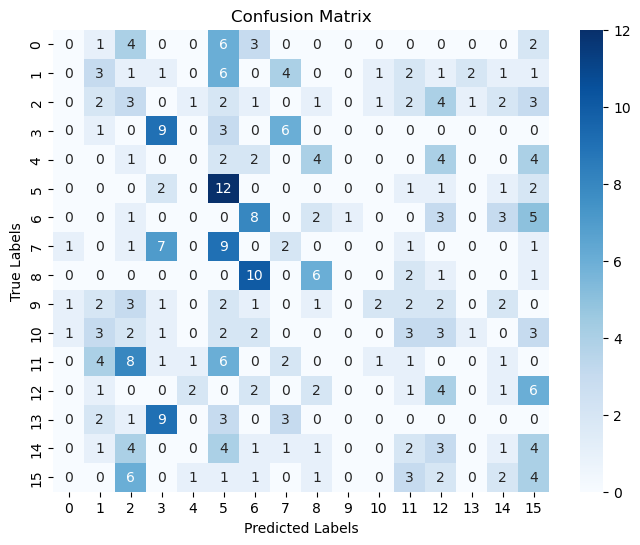

In [100]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [101]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0096, TNR = 0.9904, FNR = 1.0000
Class 1: TPR = 0.1304, FPR = 0.0559, TNR = 0.9441, FNR = 0.8696
Class 2: TPR = 0.1304, FPR = 0.1053, TNR = 0.8947, FNR = 0.8696
Class 3: TPR = 0.4737, FPR = 0.0714, TNR = 0.9286, FNR = 0.5263
Class 4: TPR = 0.0000, FPR = 0.0161, TNR = 0.9839, FNR = 1.0000
Class 5: TPR = 0.6316, FPR = 0.1494, TNR = 0.8506, FNR = 0.3684
Class 6: TPR = 0.3478, FPR = 0.0757, TNR = 0.9243, FNR = 0.6522
Class 7: TPR = 0.0909, FPR = 0.0525, TNR = 0.9475, FNR = 0.9091
Class 8: TPR = 0.3000, FPR = 0.0391, TNR = 0.9609, FNR = 0.7000
Class 9: TPR = 0.0000, FPR = 0.0032, TNR = 0.9968, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0163, TNR = 0.9837, FNR = 1.0000
Class 11: TPR = 0.0400, FPR = 0.0629, TNR = 0.9371, FNR = 0.9600
Class 12: TPR = 0.2105, FPR = 0.0779, TNR = 0.9221, FNR = 0.7895
Class 13: TPR = 0.0000, FPR = 0.0129, TNR = 0.9871, FNR = 1.0000
Class 14: TPR = 0.0455, FPR = 0.0426, TNR = 0.9574, FNR = 0.9545
Class 15: TPR = 0.1905, FPR = 0.104

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10552\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


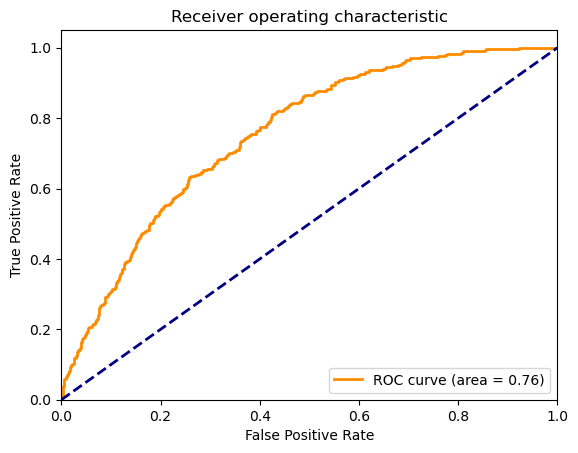

In [102]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

11/11 [==============================] - 6s 485ms/step - loss: 2.4665 - accuracy: 0.1621
Test Loss: 2.4665496349334717
Test Accuracy: 0.16207951307296753
11/11 [==============================] - 5s 411ms/step
AUC for class 0: 0.5547
AUC for class 1: 0.8084
AUC for class 2: 0.5961
AUC for class 3: 0.9142
AUC for class 4: 0.7679
AUC for class 5: 0.7582
AUC for class 6: 0.8267
AUC for class 7: 0.8019
AUC for class 8: 0.8879
AUC for class 9: 0.5716
AUC for class 10: 0.6259
AUC for class 11: 0.6574
AUC for class 12: 0.8069
AUC for class 13: 0.8589
AUC for class 14: 0.6565
AUC for class 15: 0.7049


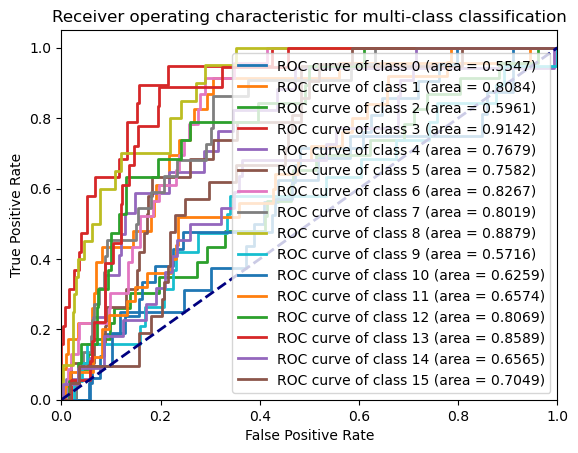

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()